In [20]:
import pandas as pd
import numpy as np
import sklearn.cluster as sk_cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.cluster import SpectralClustering

def compute_purity_f_measure(labels, clusters):
    total_correct_examples = [] # A list that has the number of correct examples for every cluster.
    f_measure_of_every_cluster = []
    for label_number in range(0, clusters):
        indexes = np.where(labels == label_number) # The indexes of the examples that belong to cluster label_number.
        # Find the number of examples in the cluster, that belong to zero category and first category.
        zero_category = 0
        first_category = 0
        for i in indexes[0]:
            if(data_set[i][-1] == 0):
                zero_category = zero_category + 1
            else:
                first_category = first_category + 1
        cluster_category = None
        number_of_correct_examples = None
        if(zero_category >= first_category):
            cluster_category = 0
            number_of_correct_examples = zero_category
        else:
            cluster_category = 1
            number_of_correct_examples = first_category
        total_correct_examples.append(number_of_correct_examples)
        # Compute f_measure.
        # I assume positive: 1 and negative: 0.
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for i in indexes[0]:
            if(data_set[i][-1] == cluster_category):
                if(cluster_category == 1):
                    true_positive = true_positive + 1
                else:
                    true_negative = true_negative + 1
            else:
                if(cluster_category == 1):
                    false_positive = false_positive + 1
                else:
                    false_negative = false_negative + 1
        precision = 0
        recall = 0
        if((true_positive + false_positive) != 0):    
            precision = true_positive / (true_positive + false_positive)
        if((true_positive + false_negative) != 0):    
            recall = true_positive / (true_positive + false_negative)
        f_measure = 0
        if(precision == recall == 0):
            f_measure = 0
        else:    
            f_measure = (1 + a) / ((1 / precision) + (a / recall))
        f_measure_of_every_cluster.append(f_measure)
                    
    purity = sum(total_correct_examples) / data_set.shape[0]      
    total_f_measure = sum(f_measure_of_every_cluster)
    return purity, total_f_measure

# Choose Data Set

In [21]:
choice = int(input("Select the data set you want to apply a clustering algorithm.\nType 1 for spam dataset.\nType 2 for occupancy dataset.\nAnswer: "))
data_frame = None
data_set = None
if(choice == 1):
    data_frame = pd.read_csv('spambase_data.csv')
    data_set = np.array(data_frame)
else:
    data_frame = pd.read_csv('occupancy_dataset.csv')
    del data_frame['date']
    # Normalization (Divide each column with it's max value except the category column).
    for index_column in range(0, 5):
        data_frame.iloc[:, index_column] = data_frame.iloc[:, index_column] / data_frame.iloc[:, index_column].max()
    data_set = np.array(data_frame)
    
number_of_clusters = [2, 4, 8]
a = 1

Select the data set you want to apply a clustering algorithm.
Type 1 for spam dataset.
Type 2 for occupancy dataset.
Answer: 2


# K-Means Algorithm

In [22]:
purity_array = [] # A list to store all the purity values.
f_measure_array = [] # A list to store all the f_measure values.
for clusters in number_of_clusters: 
    kmeans_object = sk_cluster.KMeans(n_clusters = clusters, init = 'random', n_init = 20)
    # Compute cluster centers and predict cluster index for each sample.
    # kmeans_labels: the centroid of each example.
    kmeans_labels = kmeans_object.fit_predict(data_set) 
    centroids = kmeans_object.cluster_centers_ # Final centroids.
    sum_squared_error = kmeans_object.inertia_ # The final variance.
    purity, total_f_measure = compute_purity_f_measure(kmeans_labels, clusters)
    purity_array.append(purity)
    f_measure_array.append(total_f_measure)

for i in range(len(number_of_clusters)):
    print("Number of clusters: ", number_of_clusters[i])
    print("\tPurity: ", purity_array[i])
    print("\tF_measure: ", f_measure_array[i])

Number of clusters:  2
	Purity:  1.0
	F_measure:  1.0
Number of clusters:  4
	Purity:  1.0
	F_measure:  2.0
Number of clusters:  8
	Purity:  1.0
	F_measure:  3.0


# Agglomerative Hierarchical Clustering

In [23]:
# Each row of Z array has the format [idx1, idx2, dist, number_of_samples_in this_cluster].
# Z[i] will tell us which clusters were merged in the i-th iteration.
Z = linkage(data_set, 'centroid')

purity_array = [] # A list to store all the purity values.
f_measure_array = [] # A list to store all the f_measure values.
for clusters in number_of_clusters: 
    agglomerative_labels = fcluster(Z, clusters, criterion = 'maxclust') # agglomerative_labels: the centroid of each example.
    total_correct_examples = [] # A list that has the number of correct examples for every cluster.
    f_measure_of_every_cluster = []
    for label_number in range(1, clusters + 1):
        indexes = np.where(agglomerative_labels == label_number) # The indexes of the examples that belong to cluster label_number.
        # Find the number of examples in the cluster, that belong to zero category and first category.
        zero_category = 0
        first_category = 0
        for i in indexes[0]:
            if(data_set[i][-1] == 0):
                zero_category = zero_category + 1
            else:
                first_category = first_category + 1
        cluster_category = None
        number_of_correct_examples = None
        if(zero_category >= first_category):
            cluster_category = 0
            number_of_correct_examples = zero_category
        else:
            cluster_category = 1
            number_of_correct_examples = first_category
        total_correct_examples.append(number_of_correct_examples)
        # Compute f_measure.
        # I assume positive: 1 and negative: 0.
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for i in indexes[0]:
            if(data_set[i][-1] == cluster_category):
                if(cluster_category == 1):
                    true_positive = true_positive + 1
                else:
                    true_negative = true_negative + 1
            else:
                if(cluster_category == 1):
                    false_positive = false_positive + 1
                else:
                    false_negative = false_negative + 1
        precision = 0
        recall = 0
        if((true_positive + false_positive) != 0):    
            precision = true_positive / (true_positive + false_positive)
        if((true_positive + false_negative) != 0):    
            recall = true_positive / (true_positive + false_negative)
        f_measure = 0
        if(precision == recall == 0):
            f_measure = 0
        else:    
            f_measure = (1 + a) / ((1 / precision) + (a / recall))
        f_measure_of_every_cluster.append(f_measure)     
    purity = sum(total_correct_examples) / data_set.shape[0]    
    purity_array.append(purity)
    total_f_measure = sum(f_measure_of_every_cluster)
    f_measure_array.append(total_f_measure)

for i in range(len(number_of_clusters)):
    print("Number of clusters: ", number_of_clusters[i])
    print("\tPurity: ", purity_array[i])
    print("\tF_measure: ", f_measure_array[i])   

Number of clusters:  2
	Purity:  1.0
	F_measure:  1.0
Number of clusters:  4
	Purity:  1.0
	F_measure:  1.0
Number of clusters:  8
	Purity:  1.0
	F_measure:  3.0


# Spectral Clustering

Optimal number of clusters:  [   2 1734    3]


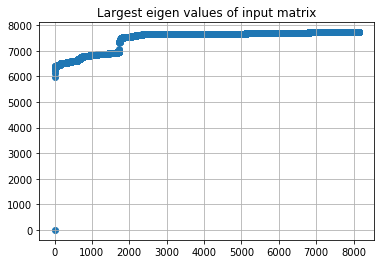

In [24]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import scipy
from scipy.sparse import csgraph
from numpy import linalg as LA
from scipy.spatial.distance import pdist, squareform
# This method:
# Returns: 
#  -the topk optimal number of clusters.
#  -all eigen values.
#  -all eigen vectors
def eigenDecomposition(affinity_matrix, plot = True, topK = 3):
    L = csgraph.laplacian(affinity_matrix) # Get Laplacian matrix.
    eigenvalues, eigenvectors = LA.eig(L) # Get eigenvalues and eigenvectors of Laplaxian matrix.
    eigenvalues = np.sort(eigenvalues, axis=None) # Sort eigenvalues matrix.
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(1, len(eigenvalues)+1), eigenvalues)
        plt.grid()
    # Identify the optimal number of clusters as the index corresponding to the larger gap between eigen values.
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
    nb_clusters = nb_clusters + 1
    return nb_clusters, eigenvalues, eigenvectors

cosine_spectral_clustering_object = SpectralClustering(n_clusters = 1, affinity = 'cosine')
cosine_spectral_labels = cosine_spectral_clustering_object.fit_predict(data_set)
affinity_matrix = cosine_spectral_clustering_object.affinity_matrix_ # Find affinity matrix.
optimal_number_of_clusters, _,  _ = eigenDecomposition(affinity_matrix)
print("Optimal number of clusters: ", optimal_number_of_clusters)

### Cosine Kernel

In [25]:
number_of_clusters = optimal_number_of_clusters[0]
spectral_clustering_object = SpectralClustering(n_clusters = number_of_clusters, affinity = 'cosine')
spectral_labels = spectral_clustering_object.fit_predict(data_set)
purity, total_f_measure = compute_purity_f_measure(spectral_labels, number_of_clusters)

print("Number of clusters: ", number_of_clusters)
print("\tPurity: ", purity)
print("\tF_measure: ", total_f_measure)  

Number of clusters:  2
	Purity:  1.0
	F_measure:  1.0
